### This set of tutorial is based on this github repository: https://github.com/MorvanZhou/PyTorch-Tutorial/blob/master/tutorial-contents/201_torch_numpy.py

#### Special thanks to the author Morvan Zhou

## 1. Learn torch tensor based on numpy

In [3]:
import torch
import numpy as np

In [4]:
np_data = np.arange(6).reshape(2,3)
np_data

array([[0, 1, 2],
       [3, 4, 5]])

In [5]:
torch_data = torch.from_numpy(np_data)
tensor2array = torch_data.numpy()

In [6]:
print ("\nnumpy array:", np_data)
print ("\nTorch tensor:", torch_data)
print ("\nTroc tensor back to array:" , tensor2array)


numpy array: [[0 1 2]
 [3 4 5]]

Torch tensor: tensor([[ 0,  1,  2],
        [ 3,  4,  5]])

Troc tensor back to array: [[0 1 2]
 [3 4 5]]


In [7]:
# abs

data = [-1,-2,1,2]
tensor = torch.FloatTensor(data)

print(
    '\nabs',
    '\nnumpy: ', np.abs(data),          # [1 2 1 2]
    '\ntorch: ', torch.abs(tensor)      # [1 2 1 2]
)


abs 
numpy:  [1 2 1 2] 
torch:  tensor([ 1.,  2.,  1.,  2.])


In [8]:
# mean 

print (
    "\nmean calculation: ",
    "\nnumpy:", np.mean(data),
    "\nTorch:", torch.mean(tensor)
)


mean calculation:  
numpy: 0.0 
Torch: tensor(0.)


In [13]:
# Matrix multiplication

data = np.array([[1,2],[3,4]], dtype = float)
tensor = torch.FloatTensor(data)

print (
    "\nMatrix multiplication: ",
    "\nnumpy: ", np.dot(data, data),
    "\nPytorch:", torch.mm(tensor, tensor)
)


Matrix multiplication:  
numpy:  [[  7.  10.]
 [ 15.  22.]] 
Pytorch: tensor([[  7.,  10.],
        [ 15.,  22.]])


## 2. Pytorch variables

In [14]:
from torch.autograd import Variable

In [15]:
tensor = torch.FloatTensor([[1,2],[3,4]])  ## This is a tensor
variable = Variable(tensor, requires_grad = True) ## This is a variable, for computing gradients

print (tensor)
print (variable)

tensor([[ 1.,  2.],
        [ 3.,  4.]])
tensor([[ 1.,  2.],
        [ 3.,  4.]])


The tensor is only a matrix and the variable looks similar to it, however variable is a part of the auto-gradient

In [16]:
t_out = torch.mean(tensor*tensor) ## this is the square of tensor
v_out = torch.mean(variable*variable) 

print (t_out)
print (v_out)

tensor(7.5000)
tensor(7.5000)


In [17]:
v_out.backward()
print (variable.grad)

tensor([[ 0.5000,  1.0000],
        [ 1.5000,  2.0000]])


In [21]:
## another try

tensor = torch.FloatTensor([[1,2,3,4]])
variable = Variable(tensor, requires_grad = True)

v_out = torch.mean(variable*variable)
v_out.backward()

print (variable.grad)
print (variable.data)

tensor([[ 0.5000,  1.0000,  1.5000,  2.0000]])
tensor([[ 1.,  2.,  3.,  4.]])


## 3. Activation functions

In [22]:
import torch.nn.functional as fun
import matplotlib.pyplot as plt

In [23]:
## creat data

x = torch.linspace(-5, 5, 200)
x = Variable(x)
x_np = x.data.numpy()

In [30]:
## use the above data to calculate different activation functions

y_relu = fun.relu(x).data.numpy()
y_sigmoid = fun.sigmoid(x).data.numpy()
y_tanh = fun.tanh(x).data.numpy()
y_softplus = fun.softplus(x).data.numpy()
y_leak = fun.leaky_relu(x,negative_slope=0.1).data.numpy()


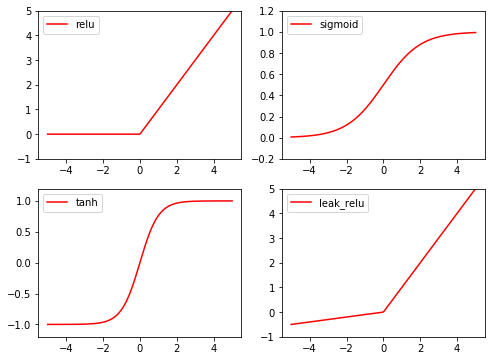

In [31]:
# plt to visualize these activation function
plt.figure(1, figsize=(8, 6))
plt.subplot(221)
plt.plot(x_np, y_relu, c='red', label='relu')
plt.ylim((-1, 5))
plt.legend(loc='best')

plt.subplot(222)
plt.plot(x_np, y_sigmoid, c='red', label='sigmoid')
plt.ylim((-0.2, 1.2))
plt.legend(loc='best')

plt.subplot(223)
plt.plot(x_np, y_tanh, c='red', label='tanh')
plt.ylim((-1.2, 1.2))
plt.legend(loc='best')

plt.subplot(224)
plt.plot(x_np, y_leak, c='red', label='leak_relu')
plt.ylim((-1, 5))
plt.legend(loc='best')

plt.show()